In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

importing dataset

In [45]:
df = pd.read_csv("churn_prediction_data.csv")

In [46]:
df.head()

,CustomerID,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1001,Male,34,5,52000.0,2,1,1,72000.0,0
1,1002,Female,35,2,58000.0,1,1,1,68000.0,1
2,1003,Female,23,2,42000.0,1,0,0,48000.0,0
3,1004,Male,42,1,53000.0,1,0,1,98000.0,1
4,1005,Female,37,1,85000.0,1,0,1,115000.0,1


In [47]:
df.tail()


,CustomerID,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
10000,11001,Male,33,4,8750.89,2,1,0,48920.22,0
10001,11002,Female,39,6,89450.33,1,0,1,102340.78,0
10002,11003,Male,31,7,142670.44,2,1,1,44580.89,0
10003,11004,Female,27,100000,22.00,1,1,0,150000.00,1
10004,11005,Male,29,50000,2.00,0,0,1,80000.00,1


checking for nan values in dataset

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10005 entries, 0 to 10004
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       10005 non-null  int64  
 1   Gender           10005 non-null  object 
 2   Age              10005 non-null  int64  
 3   Tenure           10005 non-null  int64  
 4   Balance          10005 non-null  float64
 5   NumOfProducts    10005 non-null  int64  
 6   HasCrCard        10005 non-null  int64  
 7   IsActiveMember   10005 non-null  int64  
 8   EstimatedSalary  10005 non-null  float64
 9   Exited           10005 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 781.8+ KB


In [49]:
df.isna().sum().sum()

0

therefore there are no nan values. 

checking for duplicates

In [50]:
df.duplicated().sum()

0

therefor no duplicate values

In [51]:
df.describe()

,CustomerID,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10005.000000,10005.000000,10005.000000,1.000500e+04,10005.000000,10005.00000,10005.000000,10005.000000,10005.000000
mean,6003.000000,39.448176,20.253473,1.014286e+05,1.806397,0.53953,0.514143,122503.861922,0.431184
std,2888.339056,10.164257,1117.642282,6.531556e+04,0.767960,0.49846,0.499825,53544.325040,0.495267
min,1001.000000,15.000000,0.000000,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000
25%,3502.000000,32.000000,3.000000,4.568070e+04,1.000000,0.00000,0.000000,85000.300000,0.000000
50%,6003.000000,38.000000,5.000000,1.150004e+05,2.000000,1.00000,1.000000,133456.780000,0.000000
75%,8504.000000,46.000000,7.000000,1.480006e+05,2.000000,1.00000,1.000000,167890.120000,1.000000
max,11005.000000,90.000000,100000.000000,1.950000e+06,4.000000,1.00000,1.000000,300000.000000,1.000000


obtaining corerelation

In [52]:
numeric_colums_data=df.select_dtypes(include=["number"])
numeric_colums_data.corr()

,CustomerID,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerID,1.000000,-0.054048,0.023165,0.026587,-0.050871,-0.121100,0.003787,0.021118,0.095079
Age,-0.054048,1.000000,-0.015470,0.037424,0.003600,0.040441,-0.005754,-0.012407,-0.004715
Tenure,0.023165,-0.015470,1.000000,-0.020904,-0.019878,0.003460,-0.004866,0.000986,0.015459
Balance,0.026587,0.037424,-0.020904,1.000000,-0.009444,-0.030652,0.038321,0.040147,-0.022050
NumOfProducts,-0.050871,0.003600,-0.019878,-0.009444,1.000000,-0.034973,0.001535,0.034910,0.060238
HasCrCard,-0.121100,0.040441,0.003460,-0.030652,-0.034973,1.000000,-0.035445,0.008197,-0.124928
IsActiveMember,0.003787,-0.005754,-0.004866,0.038321,0.001535,-0.035445,1.000000,0.016702,-0.141740
EstimatedSalary,0.021118,-0.012407,0.000986,0.040147,0.034910,0.008197,0.016702,1.000000,-0.013172
Exited,0.095079,-0.004715,0.015459,-0.022050,0.060238,-0.124928,-0.141740,-0.013172,1.000000


In [53]:
df

,CustomerID,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1001,Male,34,5,52000.00,2,1,1,72000.00,0
1,1002,Female,35,2,58000.00,1,1,1,68000.00,1
2,1003,Female,23,2,42000.00,1,0,0,48000.00,0
3,1004,Male,42,1,53000.00,1,0,1,98000.00,1
4,1005,Female,37,1,85000.00,1,0,1,115000.00,1
...,...,...,...,...,...,...,...,...,...,...
10000,11001,Male,33,4,8750.89,2,1,0,48920.22,0
10001,11002,Female,39,6,89450.33,1,0,1,102340.78,0
10002,11003,Male,31,7,142670.44,2,1,1,44580.89,0
10003,11004,Female,27,100000,22.00,1,1,0,150000.00,1


In [54]:
df["Exited"].value_counts()

Exited
0    5691
1    4314
Name: count, dtype: int64

upscaling

In [55]:
from sklearn.utils import resample
df_majority = df[df.Exited==0]
df_minority = df[df.Exited==1]
df_minority_upsampled = resample(df_minority,
                                 replace=True,    
                                 n_samples=len(df_majority),    
                                 random_state=123) 
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
print(df_upsampled.Exited.value_counts())

Exited
0    5691
1    5691
Name: count, dtype: int64


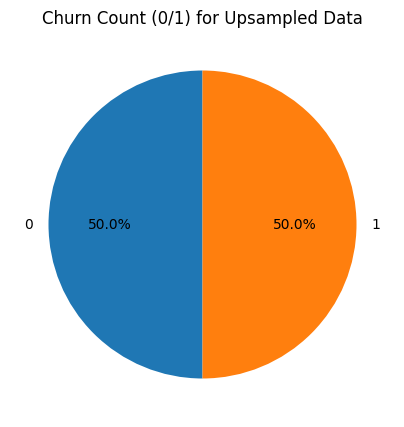

In [56]:
churn_counts_upsampled = df_upsampled['Exited'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(churn_counts_upsampled, labels=churn_counts_upsampled.index, autopct='%1.1f%%', startangle=90)
plt.title('Churn Count (0/1) for Upsampled Data')
plt.show()

In [57]:
df.head()

,CustomerID,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1001,Male,34,5,52000.0,2,1,1,72000.0,0
1,1002,Female,35,2,58000.0,1,1,1,68000.0,1
2,1003,Female,23,2,42000.0,1,0,0,48000.0,0
3,1004,Male,42,1,53000.0,1,0,1,98000.0,1
4,1005,Female,37,1,85000.0,1,0,1,115000.0,1


In [58]:
df_upsampled.groupby('Exited')['Balance'].mean()

Exited
0    102682.449357
1     99752.901184
Name: Balance, dtype: float64

In [59]:
df_upsampled.groupby(['Exited','Gender'])['Balance'].mean()

Exited  Gender
0       Female    104530.098960
        Male      100847.095846
1       Female    101782.992728
        Male       97497.662248
Name: Balance, dtype: float64

In [60]:
df_upsampled.groupby('Exited')['Tenure'].mean()

Exited
0     5.211738
1    22.858900
Name: Tenure, dtype: float64

In [61]:
df_upsampled.groupby('Exited')['Age'].mean()

Exited
0    39.489896
1    39.477596
Name: Age, dtype: float64

In [62]:
print(df_upsampled.groupby('Exited')['EstimatedSalary'].mean())

Exited
0    123117.877366
1    121875.521429
Name: EstimatedSalary, dtype: float64


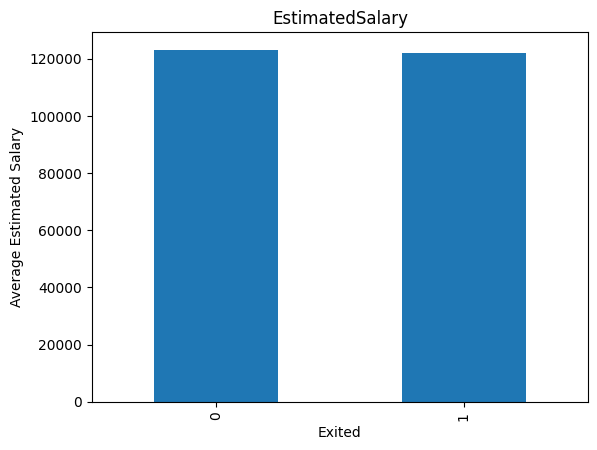

In [63]:
df_upsampled.groupby("Exited")["EstimatedSalary"].mean().plot(kind="bar")
plt.title("EstimatedSalary")
plt.xlabel("Exited")
plt.ylabel("Average Estimated Salary")
plt.show()

feature engineering

In [64]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [65]:
y=df[["Exited"]]
x=df[["CustomerID","Age","Gender","Tenure","Balance","NumOfProducts","HasCrCard","IsActiveMember","EstimatedSalary"]].copy()

In [66]:
x

,CustomerID,Age,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1001,34,Male,5,52000.00,2,1,1,72000.00
1,1002,35,Female,2,58000.00,1,1,1,68000.00
2,1003,23,Female,2,42000.00,1,0,0,48000.00
3,1004,42,Male,1,53000.00,1,0,1,98000.00
4,1005,37,Female,1,85000.00,1,0,1,115000.00
...,...,...,...,...,...,...,...,...,...
10000,11001,33,Male,4,8750.89,2,1,0,48920.22
10001,11002,39,Female,6,89450.33,1,0,1,102340.78
10002,11003,31,Male,7,142670.44,2,1,1,44580.89
10003,11004,27,Female,100000,22.00,1,1,0,150000.00


In [67]:
y

,Exited
0,0
1,1
2,0
3,1
4,1
...,...
10000,0
10001,0
10002,0
10003,1


In [68]:
df.head()

,CustomerID,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1001,Male,34,5,52000.0,2,1,1,72000.0,0
1,1002,Female,35,2,58000.0,1,1,1,68000.0,1
2,1003,Female,23,2,42000.0,1,0,0,48000.0,0
3,1004,Male,42,1,53000.0,1,0,1,98000.0,1
4,1005,Female,37,1,85000.0,1,0,1,115000.0,1


In [69]:
x["Gender"]=x["Gender"].map({"Female": 1 ,"Male":0})

In [70]:
y

,Exited
0,0
1,1
2,0
3,1
4,1
...,...
10000,0
10001,0
10002,0
10003,1


In [71]:
x["Gender"].unique()

array([0, 1], dtype=int64)

In [72]:
x.head()

,CustomerID,Age,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1001,34,0,5,52000.0,2,1,1,72000.0
1,1002,35,1,2,58000.0,1,1,1,68000.0
2,1003,23,1,2,42000.0,1,0,0,48000.0
3,1004,42,0,1,53000.0,1,0,1,98000.0
4,1005,37,1,1,85000.0,1,0,1,115000.0


In [73]:
type(x["Gender"][0])


numpy.int64

In [74]:
type(y["Exited"][0])

numpy.int64

train test split

In [75]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [76]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
import joblib
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

In [77]:
x_test = scaler.transform(x_test)


In [78]:
x_train

array([[ 1.01563245, -1.02915737,  0.97215173, ..., -1.08016522,
        -1.02916063,  0.30582959],
       [-0.14657119, -0.73317185,  0.97215173, ...,  0.9257843 ,
        -1.02916063,  0.01685672],
       [-0.29979445, -0.63451001, -1.02864602, ...,  0.9257843 ,
         0.97166562,  0.6385292 ],
       ...,
       [ 1.31374029, -0.93049553,  0.97215173, ..., -1.08016522,
        -1.02916063, -0.5800866 ],
       [ 0.63066335, -0.93049553, -1.02864602, ...,  0.9257843 ,
        -1.02916063, -0.65089137],
       [ 0.90236537, -0.63451001,  0.97215173, ...,  0.9257843 ,
        -1.02916063, -1.99326412]])

In [79]:
x_test

array([[-0.26018572,  1.24006492, -1.02864602, ...,  0.9257843 ,
         0.97166562,  0.22408647],
       [-1.02873413,  0.54943205, -1.02864602, ..., -1.08016522,
         0.97166562,  0.84557431],
       [ 1.44055773,  0.05612286,  0.97215173, ..., -1.08016522,
        -1.02916063,  0.22408647],
       ...,
       [ 0.64768816, -0.3385245 ,  0.97215173, ..., -1.08016522,
        -1.02916063, -0.44365975],
       [-1.472074  ,  1.24006492, -1.02864602, ...,  0.9257843 ,
        -1.02916063,  0.84763112],
       [ 0.74219321,  0.25344653,  0.97215173, ..., -1.08016522,
         0.97166562, -1.01950337]])

In [80]:
from sklearn.metrics import accuracy_score
def modelperformance(model_name, predictions):
  print("Accuracy score on {} is {}".format(model_name, accuracy_score(y_test,predictions)))

Importing grid search for hyper tunning

In [81]:
from sklearn.model_selection import GridSearchCV

Logistic Regression

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# Impute missing values in x_train
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)

model = LogisticRegression()

# Define parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_imputed, y_train.values.ravel())

# Best estimator
best_lr_model = grid_search.best_estimator_

# Save the model
joblib.dump(best_lr_model, "logistic_regression_model.pkl")

['logistic_regression_model.pkl']

Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier
# Initialize the Random Forest model (NO comma!)
rfc_model = RandomForestClassifier()

# Define parameter grid (NO comma!)
param_grid = {
    "n_estimators": [64, 128],
    "max_features": [3, 4],
    "bootstrap": [True]
}

# Perform grid search
grid_rfc = GridSearchCV(rfc_model, param_grid, cv=5)
grid_rfc.fit(x_train, y_train.values.ravel())

# Get best estimator
best_rfc_model = grid_rfc.best_estimator_

# Save model
joblib.dump(best_rfc_model, "random_forest_model.pkl")


['random_forest_model.pkl']

In [84]:
import xgboost as xgb

# Define XGBoost Classifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42)

# Define parameter grid
param_grid_xgb = {
    'n_estimators': [100],
    'learning_rate': [0.1],
    'max_depth': [3],
    'subsample': [1.0],
    'colsample_bytree': [1.0]
}

# Grid Search
grid_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='accuracy')
grid_xgb.fit(x_train, y_train.values.ravel())

# Best estimator
best_xgb_model = grid_xgb.best_estimator_

# Save model
joblib.dump(best_xgb_model, "xgboost_model.pkl")


['xgboost_model.pkl']

model selection

In [85]:
from sklearn.metrics import accuracy_score


# Dictionary of models
models = {
    "Logistic Regression": best_lr_model,
    "Random Forest Classifier": best_rfc_model,
    "XGBoost Classifier": best_xgb_model
}

# Evaluate and select best model
best_model_name = None
best_model = None
best_accuracy = 0

for name, model in models.items():
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy = {acc:.4f}")
    if acc > best_accuracy:
        best_model_name = name
        best_model = model
        best_accuracy = acc

# Save the best model
joblib.dump(best_model, "model.pkl")


Logistic Regression: Accuracy = 0.5892
Random Forest Classifier: Accuracy = 0.7286
XGBoost Classifier: Accuracy = 0.7161


['model.pkl']

model evaluation and output

              precision    recall  f1-score   support

           0       0.74      0.81      0.77      1154
           1       0.70      0.62      0.66       847

    accuracy                           0.73      2001
   macro avg       0.72      0.71      0.72      2001
weighted avg       0.73      0.73      0.73      2001



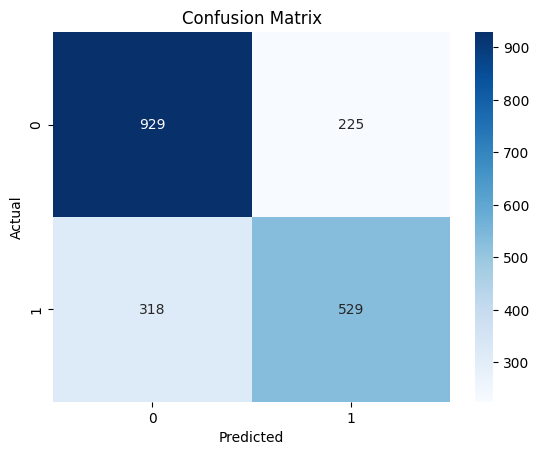

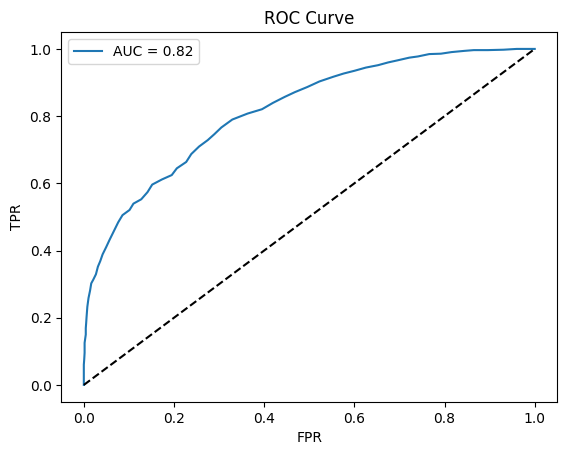

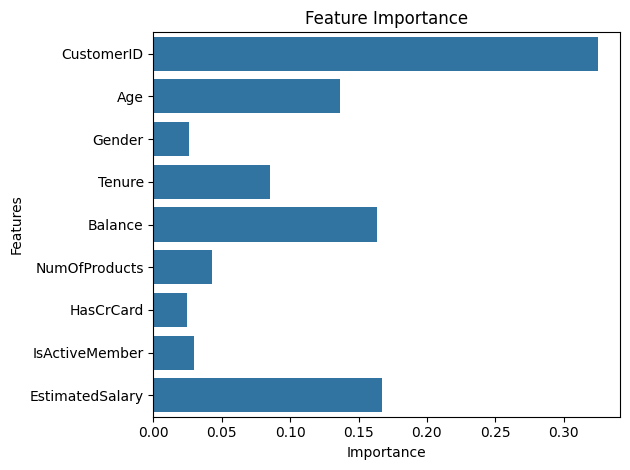

✅ Output saved to final_churn_predictions.csv


In [86]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure predictions are 1D
y_pred = best_model.predict(x_test).ravel()
y_proba = best_model.predict_proba(x_test)[:, 1].ravel()

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC and AUC
auc = roc_auc_score(y_test, y_proba)
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Feature importance (tree models only)
if hasattr(best_model, 'feature_importances_'):
    importance = best_model.feature_importances_
    features = x.columns
    sns.barplot(x=importance, y=features)
    plt.title("Feature Importance")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.tight_layout()
    plt.show()

# Ensure x_test is a DataFrame
if not isinstance(x_test, pd.DataFrame):
    x_test = pd.DataFrame(x_test, columns=x.columns)

# Add predictions to output DataFrame
output_df = x_test.copy()
output_df["Churn_Prediction"] = y_pred
output_df["Churn_Probability"] = y_proba

# Save to CSV
output_df.to_csv("final_churn_predictions.csv", index=False)
print("✅ Output saved to final_churn_predictions.csv")
